I will extract the table of the medals of Mexico in the Olympics grouped by sport.

This is just a practice of BS4.

The final result will be saved in a csv file with pandas.

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is the link to the wikipedia article: https://es.wikipedia.org/wiki/M%C3%A9xico_en_los_Juegos_Ol%C3%ADmpicos

In [2]:
html = urlopen("https://es.wikipedia.org/wiki/M%C3%A9xico_en_los_Juegos_Ol%C3%ADmpicos")
bs = BeautifulSoup(html.read(), 'html.parser')

In [3]:
print(bs.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="es">
 <head>
  <meta charset="utf-8"/>
  <title>
   México en los Juegos Olímpicos - Wikipedia, la enciclopedia libre
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clien

Extracting all the tables in the article

In [4]:
tables = bs.find_all("table")

In [5]:
len(tables)

11

In [6]:
table = bs.find("table", {'class':'wikitable'})

In [7]:
print(table)

<table class="wikitable sortable" style="font-size:90%; text-align:center" width="45%">
<tbody><tr>
<th style="background: #ccccff">Deporte
</th>
<th style="background: #ccccff">Medallas por deporte
</th>
<th style="background: #ccccff"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/Archivo:Gold_medal_olympic.svg"><img class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Gold_medal_olympic.svg/15px-Gold_medal_olympic.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Gold_medal_olympic.svg/23px-Gold_medal_olympic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Gold_medal_olympic.svg/30px-Gold_medal_olympic.svg.png 2x" width="15"/></a></span>
</th>
<th style="background: #ccccff"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/Archivo:Silver_medal_olympic.svg"><img class="mw-file-element" data-file-height="300" dat

In [8]:
table.findAll('th')

[<th style="background: #ccccff">Deporte
 </th>,
 <th style="background: #ccccff">Medallas por deporte
 </th>,
 <th style="background: #ccccff"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/Archivo:Gold_medal_olympic.svg"><img class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Gold_medal_olympic.svg/15px-Gold_medal_olympic.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Gold_medal_olympic.svg/23px-Gold_medal_olympic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Gold_medal_olympic.svg/30px-Gold_medal_olympic.svg.png 2x" width="15"/></a></span>
 </th>,
 <th style="background: #ccccff"><span typeof="mw:File"><a class="mw-file-description" href="/wiki/Archivo:Silver_medal_olympic.svg"><img class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/comm

In [9]:
titles = []
for i, title in enumerate(table.findAll('th')):
    text = title.get_text()[:-1]
    if title.get_text()[:-1] != "": titles.append(text)
    else:
        if i == 2: titles.append("Oro")
        elif i == 3: titles.append("Plata")
        else: titles.append("Bronce")

In [10]:
titles

['Deporte', 'Medallas por deporte', 'Oro', 'Plata', 'Bronce', '%']

In [11]:
rows = table.tbody.findAll("tr")[1:]

In [12]:
rows

[<tr>
 <td><a href="/wiki/Saltos_en_los_Juegos_Ol%C3%ADmpicos" title="Saltos en los Juegos Olímpicos">Clavados</a>
 </td>
 <td style="text-align: right;">15
 </td>
 <td style="text-align: right;">1
 </td>
 <td style="text-align: right;">7
 </td>
 <td style="text-align: right;">7
 </td>
 <td style="text-align: right;">20.54%
 </td></tr>,
 <tr>
 <td><a href="/wiki/Boxeo_en_los_Juegos_Ol%C3%ADmpicos" title="Boxeo en los Juegos Olímpicos">Boxeo</a>
 </td>
 <td style="text-align: right;">13
 </td>
 <td style="text-align: right;">2
 </td>
 <td style="text-align: right;">3
 </td>
 <td style="text-align: right;">8
 </td>
 <td style="text-align: right;">17.80%
 </td></tr>,
 <tr>
 <td><a href="/wiki/Atletismo_en_los_Juegos_Ol%C3%ADmpicos" title="Atletismo en los Juegos Olímpicos">Atletismo</a>
 </td>
 <td style="text-align: right;">11
 </td>
 <td style="text-align: right;">3
 </td>
 <td style="text-align: right;">6
 </td>
 <td style="text-align: right;">2
 </td>
 <td style="text-align: right;">1

In [13]:
for x in rows[0].findAll("td"):
    print(x.get_text())

Clavados

15

1

7

7

20.54%



In [14]:
data = [[info.get_text()[:-1] for info in r.findAll("td")] for r in rows]

In [15]:
data

[['Clavados', '15', '1', '7', '7', '20.54%'],
 ['Boxeo', '13', '2', '3', '8', '17.80%'],
 ['Atletismo', '11', '3', '6', '2', '15.06%'],
 ['Taekwondo', '7', '2', '2', '3', '9.58%'],
 ['Ecuestres', '7', '2', '1', '4', '9.58%'],
 ['Halterofilia', '4', '1', '0', '3', '5.47%'],
 ['Tiro con Arco', '3', '0', '1', '2', '4.10%'],
 ['Natación', '2', '1', '0', '1', '2.73%'],
 ['Fútbol', '2', '1', '0', '1', '2.73%'],
 ['Ciclismo', '2', '0', '1', '1', '2.73%'],
 ['Polo', '2', '0', '0', '2', '2.73%'],
 ['Esgrima', '1', '0', '1', '0', '1.36%'],
 ['Lucha grecorromana', '1', '0', '1', '0', '1.36%'],
 ['Tiro', '1', '0', '1', '0', '1.36%'],
 ['Basquetbol', '1', '0', '0', '1', '1.36%'],
 ['Pentatlón Moderno', '1', '0', '0', '1', '1.36%'],
 ['Total', '73', '13', '24', '36', '100%']]

With these information the extraction is finished. So, let's create the dataframe.

In [16]:
df = pd.DataFrame(data=data, columns=titles)

In [17]:
df

,Deporte,Medallas por deporte,Oro,Plata,Bronce,%
0,Clavados,15,1,7,7,20.54%
1,Boxeo,13,2,3,8,17.80%
2,Atletismo,11,3,6,2,15.06%
3,Taekwondo,7,2,2,3,9.58%
4,Ecuestres,7,2,1,4,9.58%
5,Halterofilia,4,1,0,3,5.47%
6,Tiro con Arco,3,0,1,2,4.10%
7,Natación,2,1,0,1,2.73%
8,Fútbol,2,1,0,1,2.73%
9,Ciclismo,2,0,1,1,2.73%


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Deporte               17 non-null     object
 1   Medallas por deporte  17 non-null     object
 2   Oro                   17 non-null     object
 3   Plata                 17 non-null     object
 4   Bronce                17 non-null     object
 5   %                     17 non-null     object
dtypes: object(6)
memory usage: 948.0+ bytes


In [19]:
df["Deporte"] = df["Deporte"].astype("string")
df["Medallas por deporte"] = df["Medallas por deporte"].astype("int64")
df["Oro"] = df["Oro"].astype("int64")
df["Plata"] = df["Plata"].astype("int64")
df["Bronce"] = df["Bronce"].astype("int64")
df["%"] = df["%"].apply(lambda x: float(x[:-1]))

In [20]:
df

,Deporte,Medallas por deporte,Oro,Plata,Bronce,%
0,Clavados,15,1,7,7,20.54
1,Boxeo,13,2,3,8,17.80
2,Atletismo,11,3,6,2,15.06
3,Taekwondo,7,2,2,3,9.58
4,Ecuestres,7,2,1,4,9.58
5,Halterofilia,4,1,0,3,5.47
6,Tiro con Arco,3,0,1,2,4.10
7,Natación,2,1,0,1,2.73
8,Fútbol,2,1,0,1,2.73
9,Ciclismo,2,0,1,1,2.73


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Deporte               17 non-null     string 
 1   Medallas por deporte  17 non-null     int64  
 2   Oro                   17 non-null     int64  
 3   Plata                 17 non-null     int64  
 4   Bronce                17 non-null     int64  
 5   %                     17 non-null     float64
dtypes: float64(1), int64(4), string(1)
memory usage: 948.0 bytes


Let's create a simple visualization

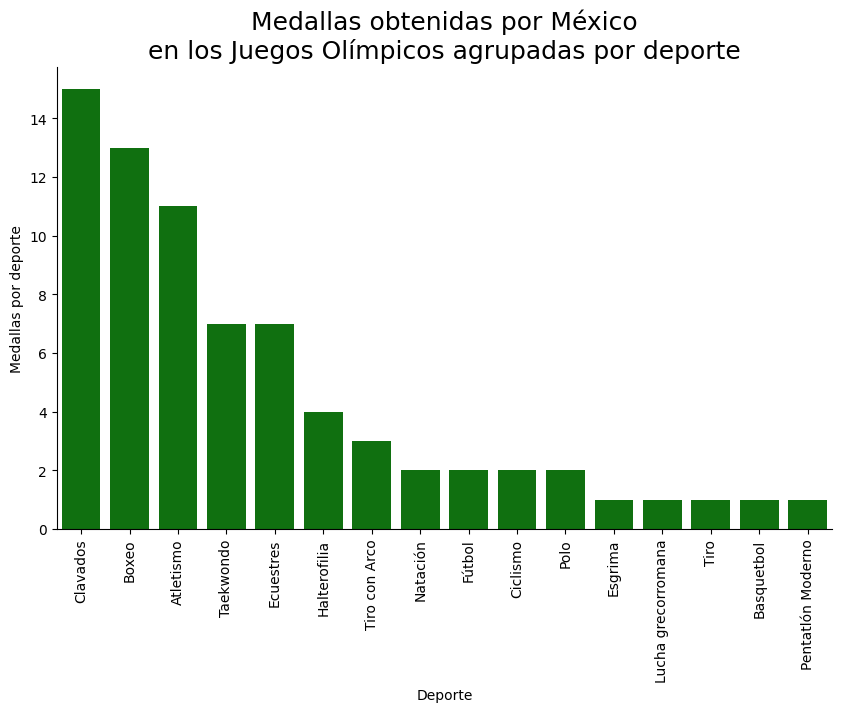

In [41]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df["Deporte"].drop(16, axis=0), y=df["Medallas por deporte"].drop(16, axis=0), color='green')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=90)
plt.title("Medallas obtenidas por México\nen los Juegos Olímpicos agrupadas por deporte", fontsize=18)
plt.show()

In [42]:
df.to_csv("Medallas obtenidas por México en los Juegos Olímpicos agrupadas por deporte.csv", index=False)